In [1]:
import numpy as np
import scipy as sp 
from methods import *
import matplotlib.pyplot as plt
from magnus_methods import *

#### a)

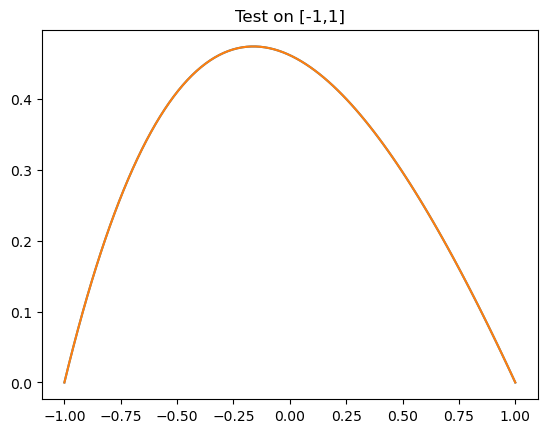

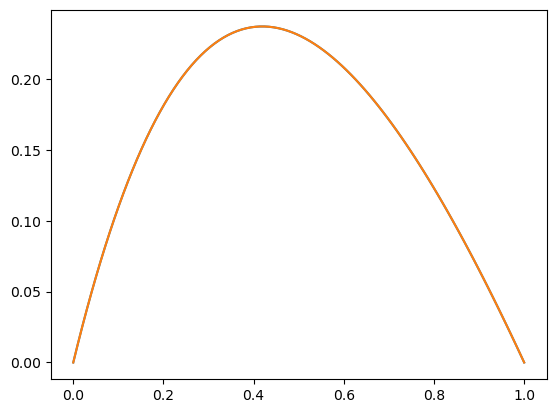

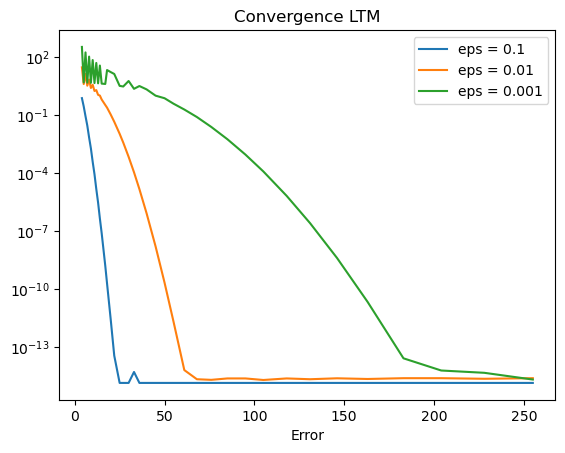

In [2]:
def ffun(x):
    return 1
ffun = np.vectorize(ffun)

def utrue(x,eps):
    return ( np.exp(-x/eps) + x - 1 - np.exp(-1/eps)*x )/( np.exp(-1/eps) - 1 )
utrue = np.vectorize(utrue)

def testtrue(x):
    return ( np.exp(2) + 1 - 2*np.exp(1-x) )/(np.exp(2) - 1) - x
testtrue = np.vectorize(testtrue)

m = 100
#X = np.arange(m)/m*2 - 1
X = np.linspace(-1,1,m)

testsol = LTM_2ord(X, 8, -1, -1)

plt.figure
plt.plot(X,testtrue(X))
plt.plot(X,testsol)
plt.title("Test on [-1,1]")
plt.show()


XX = np.linspace(0,1,m)
eps = 0.5
usol = LTM_2ord(XX*2-1,16,-4*eps,-2)
plt.figure()
plt.plot(XX,utrue(XX,eps))
plt.plot(XX,usol)
plt.show()


# convergence
EPS = [0.1,0.01,0.001]
Ns = np.ceil(np.logspace(0,2.4,50))+3
err = np.empty_like(Ns)
plt.figure()
for e in EPS:
    for i in range(len(Ns)):
        urec = LTM_2ord(XX*2-1,int(Ns[i]),-4*e,-2)
        err[i] = np.linalg.norm(utrue(XX,e) - urec)
    plt.semilogy(Ns,err,label=f"eps = {e}")
plt.title("Convergence LTM")
plt.xlabel("Number of basis polynomials")
plt.xlabel("Error")
plt.legend()
plt.show()


### Part 3
#### 4)

In [3]:
P = 50
def ffun(t):
    return np.pi**2*np.sin(np.pi*t)
ffun = np.vectorize(ffun)
def utrue(t):
    return np.sin(np.pi*t)+0.5
utrue = np.vectorize(utrue)
XX = np.arange(100)/100*2-1


us,r,_ = SBM(P, utrue(-1),utrue(1),ffun=ffun,method='strong_CBM')

plt.figure
plt.plot(r,us)
plt.plot(XX,utrue(XX))
plt.show()

uw,r,_ = SBM(P, utrue(-1),utrue(1),ffun=ffun,method='weak_CBM')

plt.figure
plt.plot(r,uw)
plt.plot(XX,utrue(XX))
plt.show()



ValueError: too many values to unpack (expected 2)

In [12]:
Ns = np.arange(2,16)*2
Ds = [-0.5,-0.25,0,0.25,0.5]
err = np.empty((2+len(Ds),len(Ns)))
CA = np.empty(err.shape)

for i in range(len(Ns)):
    M = massGL(int(Ns[i]))
    us,r,ca = SBM(int(Ns[i]), utrue(-1),utrue(1),ffun=ffun,method='strong_CBM')
    err[0,i] = np.linalg.norm(us-utrue(r))
    CA[0,i] = ca
    uw,r,ca = SBM(int(Ns[i]), utrue(-1),utrue(1),ffun=ffun,method='weak_CBM')
    err[1,i] = np.linalg.norm(uw-utrue(r))
    CA[1,i]
    for j in range(len(Ds)):
        usbm,r, ca = SBM(int(Ns[i]), utrue(-1-Ds[j]),utrue(1+Ds[j]),ffun=ffun,method='weak_SBM',d=Ds[j])
        err[2+j,i] = np.linalg.norm(usbm-utrue(r))
        CA[2+j,i] = ca

plt.figure
lw = 0.8
ms = 3
plt.semilogy(Ns,err[0],'o--',label='Strong',linewidth=lw,markersize=ms)
plt.semilogy(Ns,err[1],'o--',label='Weak',linewidth=lw,markersize=ms)
for i in range(len(Ds)):
    plt.semilogy(Ns,err[2+i],'o--',label='Weak SBM, d = {}'.format(Ds[i]),linewidth=lw,markersize=ms)
plt.legend()
plt.show()

ValueError: not enough values to unpack (expected 3, got 2)

#### SBM Solver